<a href="https://colab.research.google.com/github/Chrissroman/analisis_monetario_2020/blob/main/an%C3%A1lisis_monetario_ves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyección Monetaria 2021

## 1. VES

### 1.1 Carga e Instalación de Liberias base


In [33]:
# Librerias base
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Tamaño predeterminado de los plots.
matplotlib.rcParams['figure.figsize'] = {5, 20}
sns.set()

Investing tiene una base de datos Currency Change muy basta y servirá para importar los datos del último año para realizar proyecciones para el año 2021

In [34]:
# Investing API 
!pip install investpy
!pip install plotly

In [35]:
# Se importa la libreria recien creada:
import investpy as inpy

## 2.Carga de CSV's

Importamos la base de datos VES - USD de fuente @enparalelovzla en su cuenta de INSTRAGRAM. Dicha data se encuentra en un archivo de formato csv, hemos de transformar dicha data en DataFrame para poder operar sobre ella.

### 2.1VES - USD (BCV)
En primer lugar valores del tipo de cambio historico con el Banco Central de Venezuela BCV

In [36]:
# Directorio del fichero
mainpath = '/content/drive/MyDrive/Colab Notebooks'
filepath = 'VES - USD.csv'
fullpath = os.path.join(mainpath,filepath)

In [37]:
# Lectura
ves_usd = pd.read_csv(fullpath, delimiter = ';', decimal=',')

In [38]:
# Transformación de campo en un formato DateTime of DataFrame
ves_usd['Fecha'] = pd.to_datetime(ves_usd['Fecha'])
ves_usd.rename(columns = {'Promedio': 'Monitor'}, inplace = True)
ves_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    1118 non-null   datetime64[ns]
 1   BCV      752 non-null    float64       
 2   Monitor  1118 non-null   float64       
 3   MAX      1118 non-null   float64       
 4   MIN      1118 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 43.8 KB


In [39]:
# Visualización General
ves_usd.head()

,Fecha,BCV,Monitor,MAX,MIN
0,2018-01-01,NaN,1.102,1.20,0.94
1,2018-02-01,NaN,1.134,1.26,0.98
2,2018-03-01,NaN,1.112,1.23,0.99
3,2018-04-01,NaN,1.172,1.28,0.99
4,2018-05-01,NaN,1.218,1.37,0.99


### 2.2 Nuevas Variables

**Variable DELTA**

Se crea un campo donde se aprecien los diferenciales de cambio lo que permite entender el comportamientos estacionales y los ritmos de crecimiento y decrecimiento del tipo de cambio.

In [40]:
# Creación de Deltas para BCV y Monitor
col = ['BCV', 'Monitor']
for col in col:

  delta = []
  for i in range(0, ves_usd.shape[0]):
    if i == 0:
      delta.append(np.nan)
    else:
      value = ((ves_usd[col][i] - ves_usd[col][i-1])/ves_usd[col][i]) * 100 
      delta.append(value)

  str = 'Delta ' + col
  ves_usd[str] = delta

In [41]:
# Se fija como indice la Fecha y se elimina el campo sobrante
ves_usd.index = ves_usd['Fecha']
ves_usd.sort_index()
ves_usd.drop(['Fecha'], axis = 1, inplace = True)
ves_usd.head()

,BCV,Monitor,MAX,MIN,Delta BCV,Delta Monitor
Fecha,,,,,,
2018-01-01,NaN,1.102,1.20,0.94,NaN,NaN
2018-02-01,NaN,1.134,1.26,0.98,NaN,2.821869
2018-03-01,NaN,1.112,1.23,0.99,NaN,-1.978417
2018-04-01,NaN,1.172,1.28,0.99,NaN,5.119454
2018-05-01,NaN,1.218,1.37,0.99,NaN,3.776683


# 3. Analisis Gráfico

Analisis Gráfico para los tipos de cambio del Banco Central y Paralelo

## 3.1 Analisis VES - USD Banco Central 
Realizamos el analisis por medias mensuales y semanales para los años 2019 y 2020, pero se pueden realizar en tendencias diarias y anaules.

In [42]:
# Set de datos organizados en Semanas y Meses
ves_bcv = ves_usd['Delta BCV']
semanas_bcv = ves_bcv.resample('W').sum()
meses_bcv = ves_bcv.resample('M').sum()

Text(0, 0.5, 'Delta en %')

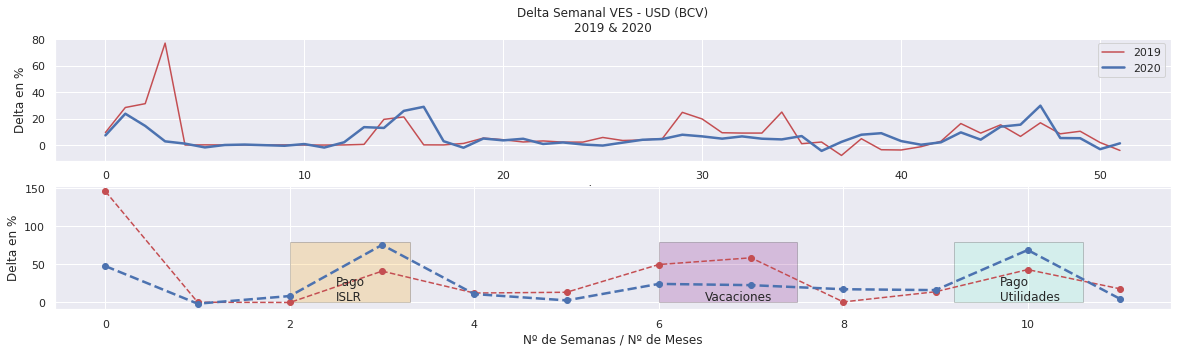

In [43]:
# Ploteamos las curvas delta banco central años 2019 y 2020
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Semanas
ax[0].set_title('Delta Semanal VES - USD (BCV)\n2019 & 2020')
ax[0].plot(semanas_bcv['2019'].values, 'r', label = '2019')
ax[0].plot(semanas_bcv['2020'].values, 'b', label = '2020', linewidth = 2.5)
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('Nº de Semanas')
ax[0].set_ylabel('Delta en %')

# Zonas de interes

islr = (2,0)
vac = (6,0)
util = (9.2,0)

ax[1].add_patch(matplotlib.patches.Rectangle(islr, width = 1.3, height = 80, edgecolor = 'black', facecolor = 'orange', alpha = 0.2))
ax[1].text(islr[0] + 0.5, 2, "Pago\nISLR")
ax[1].add_patch(matplotlib.patches.Rectangle(vac, width = 1.5, height = 80, edgecolor = 'black', facecolor = 'purple', alpha = 0.2))
ax[1].text(vac[0] + 0.5, 2, "Vacaciones")
ax[1].add_patch(matplotlib.patches.Rectangle(util, width = 1.4, height = 80, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.2))
ax[1].text(util[0] + 0.5, 3, "Pago\nUtilidades")

# Meses
ax[1].plot(meses_bcv['2019'].values, 'r--o', label = 'Enero 2019')
ax[1].plot(meses_bcv['2020'].values, 'b--o', label = 'Enero 2020', linewidth = 2.5)
ax[1].set_xlabel('Nº de Semanas / Nº de Meses')
ax[1].set_ylabel('Delta en %')


Se puede observar unas tendencias estacionales en el comportamiento del tipo de cambió, para los meses Febrero-Marzo **ISLR**, meses previos a las **Vacaciones** Junio-Julio y finalmente los pagos de **Utilidades** de los meses Octubre-Noviembre. 

In [44]:
# Gráfico interactivo
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df_plot_m = ves_usd['2018-01-01':'2022-01-22'].resample('M').sum()
df_plot_s = ves_usd['2018-01-01':'2022-01-22'].resample('W').sum()

fig = make_subplots(rows = 2, cols = 1, subplot_titles=('Delta BCV Semanal', 'Delta BCV Mensual'))

fig.add_trace(go.Scatter(y = df_plot_s['2019']['Delta BCV'].values, mode = 'lines+markers', name = '2019'),
              row = 1, col = 1)
fig.add_trace(go.Scatter(y = df_plot_s['2020']['Delta BCV'].values, mode = 'lines+markers', name = '2020'),
              row = 1, col = 1)

fig.add_trace(go.Scatter(y = df_plot_m['2019']['Delta BCV'].values, mode = 'lines+markers', name = '2019'),
              row = 2, col = 1)
fig.add_trace(go.Scatter(y = df_plot_m['2020']['Delta BCV'].values, mode = 'lines+markers', name = '2020'),
              row = 2, col = 1)


## 3.2 Analisis VES - USD (Monitor)
Realizamos un cálculo similar con el USD de @enparalelovzla, esta vez desde el año 2018 hasta el año 2020

In [45]:
meses_monitor = ves_usd['Delta Monitor'].resample('M').sum()
semanas_monitor = ves_usd['Delta Monitor'].resample('W').sum()

Text(0, 0.5, 'Delta en %')

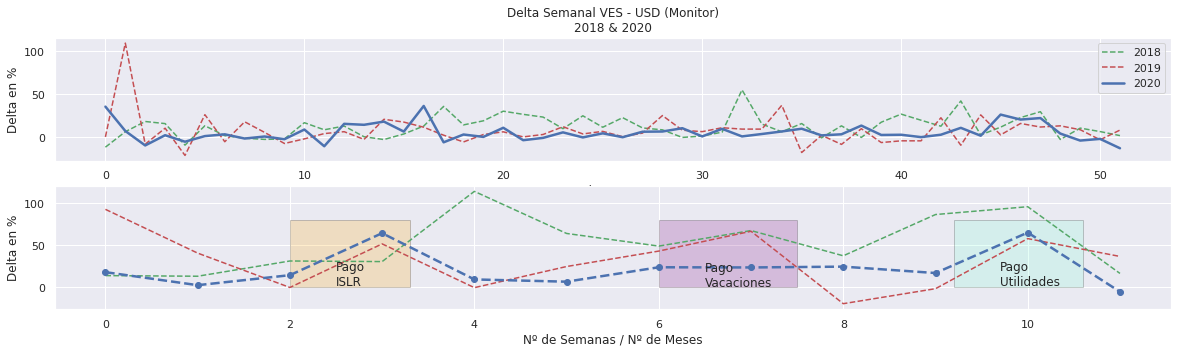

In [46]:
# Plot de graficos Delta Medio Mensual VES - USD en @enparalelovzla
# Ploteamos las curvas delta banco central años 2019 y 2020
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Semanas
ax[0].set_title('Delta Semanal VES - USD (Monitor)\n2018 & 2020')
ax[0].plot(semanas_monitor['2018'].values, 'g--', label = '2018', linewidth = 1.5)
ax[0].plot(semanas_monitor['2019'].values, 'r--', label = '2019', linewidth = 1.5)
ax[0].plot(semanas_monitor['2020'].values, 'b', label = '2020', linewidth = 2.5)
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('Nº de Semanas')
ax[0].set_ylabel('Delta en %')

# Zonas de interes
islr = (2,0)
vac = (6,0)
util = (9.2,0)

ax[1].add_patch(matplotlib.patches.Rectangle(islr, width = 1.3, height = 80, edgecolor = 'black', facecolor = 'orange', alpha = 0.2))
ax[1].text(islr[0] + 0.5, 2.2 , "Pago\nISLR")
ax[1].add_patch(matplotlib.patches.Rectangle(vac, width = 1.5, height = 80, edgecolor = 'black', facecolor = 'purple', alpha = 0.2))
ax[1].text(vac[0] + 0.5, 1.4, "Pago\nVacaciones")
ax[1].add_patch(matplotlib.patches.Rectangle(util, width = 1.4, height = 80, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.2))
ax[1].text(util[0] + 0.5, 2.5, "Pago\nUtilidades")

# Meses
ax[1].plot(meses_monitor['2018'].values, 'g--', label = 'Enero 2018')
ax[1].plot(meses_monitor['2019'].values, 'r--', label = 'Enero 2019')
ax[1].plot(meses_monitor['2020'].values, 'b--o', label = 'Enero 2020', linewidth = 2.5)
ax[1].set_xlabel('Nº de Semanas / Nº de Meses')
ax[1].set_ylabel('Delta en %')

El comportamiento parecido, sin embargo su volatidad es mayor ya que el tipo de cambio paralelo suele tener una varianza mayor en sus cotizaciones interdiarias. De igual forma, las zonas de interes **ISLR, Vacaciones y Utilidades** siguen ofreciendo comportamientos estacionales.

## 3.3 Tipo de Cambio VES - USD / BCV vs Monitor

El comportamiento de los dos tipos de cambio son similiares aunque con ciertas difernecias en la volatidad, graficamos para tener una mejor observación.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

Text(0.5, 1.0, '2020')

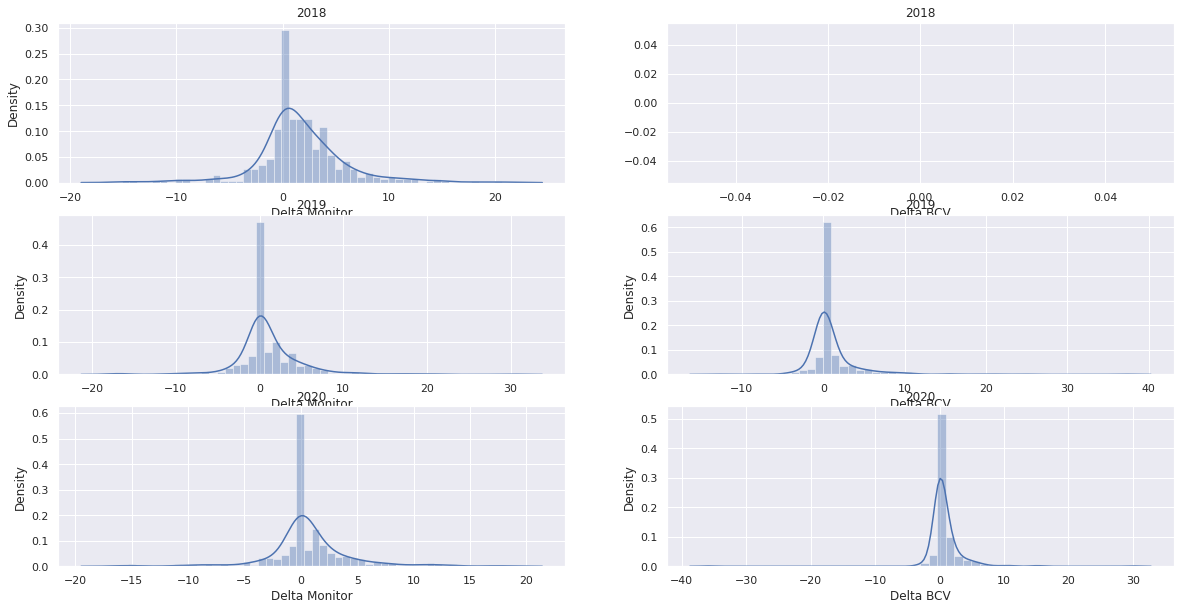

In [47]:
# Graficación de la distribución Normal de los DELTAS
import plotly.figure_factory as ff

fig, ax = plt.subplots(nrows = 3, ncols = 2)
fig.set_size_inches(20,10)

# Delta Diarios
sns.distplot(ves_usd['2018']['Delta Monitor'], ax = ax[0,0], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2019']['Delta Monitor'], ax = ax[1,0], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2020']['Delta Monitor'], ax = ax[2,0], bins = 50, norm_hist = True)

sns.distplot(ves_usd['2018']['Delta BCV'], ax = ax[0,1], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2019']['Delta BCV'], ax = ax[1,1], bins = 50, norm_hist = True)
sns.distplot(ves_usd['2020']['Delta BCV'], ax = ax[2,1], bins = 50, norm_hist = True)

# Deltas Semanales
#sns.distplot(semanas_monitor['2018'], ax = ax[0,0], bins = 50, norm_hist = True)
#sns.distplot(semanas_monitor['2019'], ax = ax[1,0], bins = 50, norm_hist = True)
#sns.distplot(semanas_monitor['2020'], ax = ax[2,0], bins = 50, norm_hist = True)

#sns.distplot(semanas_bcv['2018'], ax = ax[0,1], bins = 50, norm_hist = True)
#sns.distplot(semanas_bcv['2019'], ax = ax[1,1], bins = 50, norm_hist = True)
#sns.distplot(semanas_bcv['2020'], ax = ax[2,1], bins = 50, norm_hist = True)

ax[0,0].set_title("2018")
ax[1,0].set_title("2019")
ax[2,0].set_title("2020")
ax[0,1].set_title("2018")
ax[1,1].set_title("2019")
ax[2,1].set_title("2020")

Claramente los datos presentan un comportamiento normal con medias desplazadas a la derecha de la curva en todos los casos.

Los diferenciales diarios de Monitor con respecto al Banco Central de Venezuela presentan una mayor dispersión en la curva normal y por tanto podemos inferir que las medidas de dispersión presentan cifras mayores.

El año 2020 presentan una dispersión y varianza mayor que años previos, su comportamiento es homogeneamente disperso.

Podemos inferir que el comportamiento diferencial del Banco Central de Venezuela es mayormente conservador a diferencia del mercado paralelo.

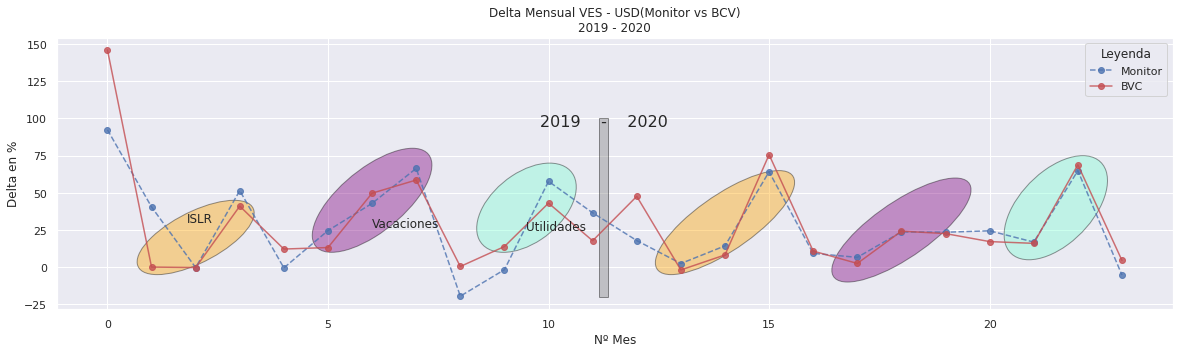

In [48]:
# Creación de Subplots
fig, ax = plt.subplots(nrows = 1, ncols = 1)

islr = 2
aginaldos = 11

# Plot Banco Central y Monitor
ax.plot(meses_monitor['2019':'2020'].values, 'b--o', label = 'Monitor', alpha = 0.8)
ax.plot(meses_bcv['2019':'2020'].values, 'r-o', label = 'BVC', alpha = 0.8)
ax.add_patch(matplotlib.patches.Rectangle((11.15,-20), 0.2, 120, edgecolor = 'black', facecolor = 'grey', alpha = 0.4))
ax.text(x = 9.8, y = 95, s = '2019    -    2020', fontsize = 16)

# Zonas de Interes
islr = (2,20)
vac = (6,45)
util = (9.5,40)

ax.add_patch(matplotlib.patches.Ellipse(islr, 2, 50, edgecolor = 'black', facecolor = 'orange', alpha = 0.4, angle = -2))
ax.text(islr[0] - 0.2, 30, 'ISLR', fontsize = 12)
ax.add_patch(matplotlib.patches.Ellipse((islr[0] + 12, islr[1] + 10), 2, 70, edgecolor = 'black', facecolor = 'orange', alpha = 0.4 , angle = -2))

ax.add_patch(matplotlib.patches.Ellipse(vac, 2, 70, edgecolor = 'black', facecolor = 'purple', alpha = 0.4 , angle = -1.5))
ax.text(vac[0], 27, 'Vacaciones', fontsize = 12)
ax.add_patch(matplotlib.patches.Ellipse((vac[0]+ 12, vac[1] - 20), 2, 70, edgecolor = 'black', facecolor = 'purple', alpha = 0.4 , angle = -2))

ax.add_patch(matplotlib.patches.Ellipse(util, 2, 60, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.4 , angle = -1))
ax.text(util[0], 25, 'Utilidades', fontsize = 12)
ax.add_patch(matplotlib.patches.Ellipse((util[0]+ 12, util[1]), 2, 70, edgecolor = 'black', facecolor = 'aquamarine', alpha = 0.4 , angle = -1))

# Leyendas
plt.xlabel('Nº Mes')
plt.ylabel('Delta en %')
plt.title('Delta Mensual VES - USD(Monitor vs BCV)\n2019 - 2020')
plt.legend(loc = 'upper right', title = 'Leyenda')

## 3.4 Correlación Devaluación Vs Inflación

Determinamos la correlación de el ritmo de inflación mensual con la devaluación monetaria marcada tanto por BCV como el mercado paralelo.

### 3.4.1 Carga de Datos de Inflación.

Cargamos los datos desde un archivo 'cvs' donde de igual forma disponemos de la librería PANDAS para realizar la carga.

In [49]:
# Carga de fichero csv.
# Directorio del fichero
mainpath = '/content/drive/MyDrive/Colab Notebooks'
filepath = 'Inflacion Venezuela.csv'
fullpath = os.path.join(mainpath,filepath)
df_csv = pd.read_csv(fullpath, delimiter= ';', decimal= ',')
df_csv.head()

,Year,Mounth,Inflation,Accumulated Inflation
0,2017,1,18.75,18.75
1,2017,2,20.25,42.40
2,2017,3,16.25,65.50
3,2017,4,16.55,92.80
4,2017,5,18.25,127.90


In [50]:
# Se organiza el index nuevamente para que sea reconocido cómo DateTime
df_csv['Date'] = (df_csv['Year'].astype('string')) + ' / ' + df_csv['Mounth'].astype('string')
df_csv['Date'] = pd.to_datetime(df_csv['Date'])
df_csv.index = df_csv['Date']
df_csv.drop(['Year','Mounth', 'Date'], axis=1, inplace=True)
df_csv.head()

,Inflation,Accumulated Inflation
Date,,
2017-01-01,18.75,18.75
2017-02-01,20.25,42.40
2017-03-01,16.25,65.50
2017-04-01,16.55,92.80
2017-05-01,18.25,127.90


### 3.4.2 Análisis Gráfico de la Inflación 
Graficamos los años 2018, 2019 y 2020. El año 2018 resulto tener mayor volatidad sobre la inflación a diferencia de los años posteriores.

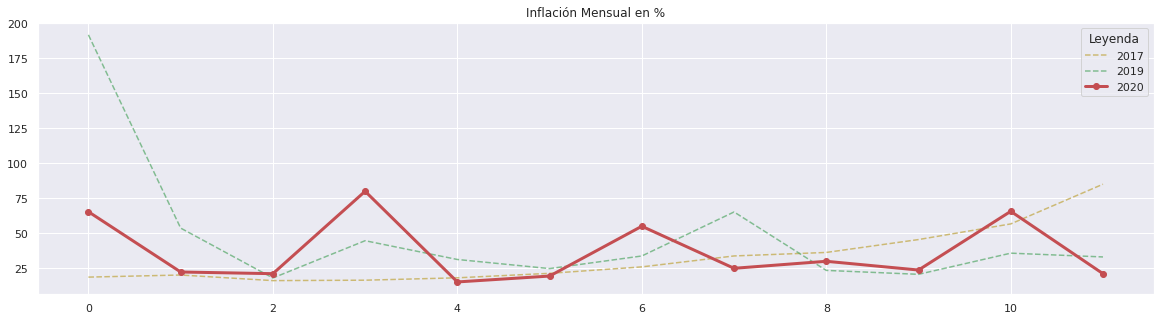

In [51]:
# Graficamos cada año
df_inf_men = df_csv['Inflation '].resample('M').sum()
df_inf_acum = df_csv['Accumulated Inflation'].resample('M').sum()

# Inflación mensual
plt.plot(df_inf_men['2017'].values, 'y--', label = '2017', alpha = 1, linewidth = 1.5)
#plt.plot(df_inf_men['2018'].values, 'b--', label = '2018', alpha = 0.7, linewidth = 1.5)
plt.plot(df_inf_men['2019'].values, 'g--', label = '2019', alpha = 0.7, linewidth = 1.5)
plt.plot(df_inf_men['2020'].values, 'r-o', label = '2020', linewidth = 3)
plt.title("Inflación Mensual en %")
plt.legend(loc = 'upper right', title = 'Leyenda')


La inflación del año 2018 resulta ser muy superior a su año anterior y posteriores, por tanto graficamos su comportamiento en una grafica separada.

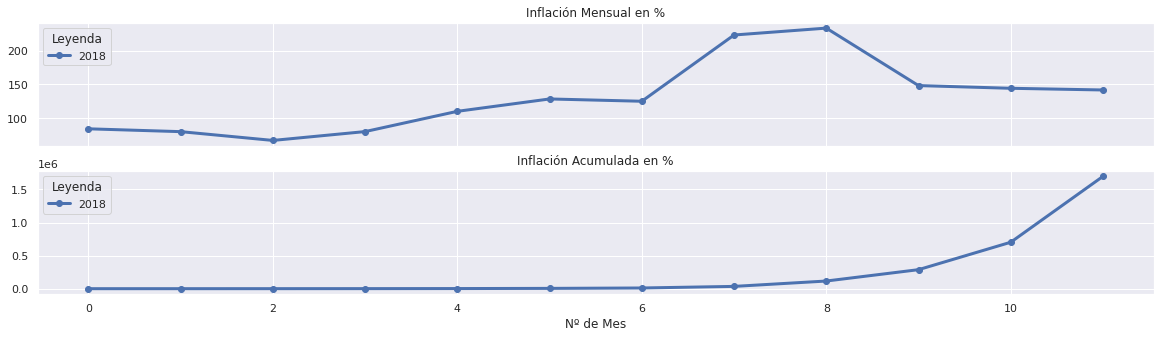

In [52]:
# Graficar año 2018

fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True)

# Inflación Mensual
ax[0].plot(df_inf_men['2018'].values, 'b-o', label = '2018', alpha = 1, linewidth = 3)
ax[0].set_title("Inflación Mensual en %")
ax[0].legend(loc = 'upper left', title = 'Leyenda')

# Inflación Acumulada
ax[1].plot(df_inf_acum['2018'].values, 'b-o', label = '2018', alpha = 1, linewidth = 3)
ax[1].set_title("Inflación Acumulada en %")
ax[1].set_xlabel('Nº de Mes')
ax[1].legend(loc = 'upper left', title = 'Leyenda')

A diferencia de los años 2017, 2019 y 2020, la aceleración de la inflación desde el mes de agosto es pronunciada para el año 2020. La inflación mensual de los años posteriores muestra un comportamiento medianamente estable, donde aunque su crecimeinto es alto, este resulta ser constante.

### 3.4.3 Correlación Devaluación Monetaria vs Inflación

Aprovechamos la oportunidad de estudiar una posible correlación en la devaluación del VES con respecto a USD y su impacto en la inflación, la misma medida en terminos de IPC (Indice de Precios al Consumidor).

In [53]:
# Vector de valores para la inflación
inf_m = df_inf_men['2018':'2020'].append(pd.Series([np.nan]), ignore_index = True)
inf_a = df_inf_acum['2018':'2020'].append(pd.Series([np.nan]), ignore_index = True)

In [54]:
# Construcción del Data Frame con los diferenciales monetarios, inflación mensual y su acumulada.
df = pd.DataFrame(index = meses_bcv.index.values)
df['Delta BCV'], df['Delta Monitor'], df['Inflación'], df['Inflación Acumulada'] = meses_bcv.values, meses_monitor.values, inf_m.values, inf_a.values

In [55]:
# Correción de valores para terminos de tanto es a 1
cols = df.columns.to_list()

for col in cols:
  df[col] = df[col].apply(lambda x: x/100)

Se arma la tabla de correlación con el método de R2 de Pearson

In [56]:
# Tabla de correlaciones entre campos.
df_corr = df.corr(method= 'pearson')
df_corr

,Delta BCV,Delta Monitor,Inflación,Inflación Acumulada
Delta BCV,1.000000,0.381784,0.088244,-0.167427
Delta Monitor,0.381784,1.000000,0.608441,0.077839
Inflación,0.088244,0.608441,1.000000,0.338414
Inflación Acumulada,-0.167427,0.077839,0.338414,1.000000


Podemos encontrar una correlación moderadamente fuerte entre los diferenciales de devaluación del tipo de cambio paralelo (monitor) con la inflación mensual, no así con los valores del tipo de cambio del Banco Central. Esto puede ser debido a su poca tendencia a una alta volatidad en su tipo de cambio. 

Esto puede ser indicio claro de un anclaje entre la inflación y el tipo de cambio del mercado paralelo y no al organismo oficial del Banco Central. Sin lugar a dudas una conclusión interesante.  

Grafiquemos un mapa de calor para poder observar este comportamiento con mejor intuición.

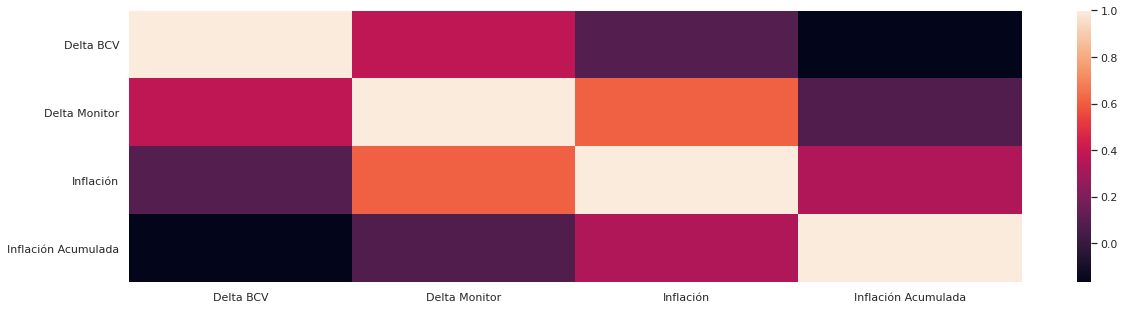

In [57]:
# Graficamos el mapa de calor con la paquetería Seaborn
sns.heatmap(df_corr, xticklabels = df_corr.columns.to_list(), yticklabels = df_corr.columns.to_list())

# 4 Modelos de Predicción

Con el fin de crear un modelo que prediga con cierto margen de error la devaluación monetaria venezolana en el año 2021, se propondrá varios modelos predictivos. 

Empezando por un cálculo sencillo, estimando valores en función de años posteriores.

Se planteará tres escenarios:

* **Optimista**
* **Conservador**
* **Pesimista**

## 4.1 Predicción por Medias

Se construye un modelo de predicción mediante las medias metricas de los años anteriores, se hará una multiplicación por un escalar que nos permita dibujar curvas **Optimistas** y **Pesimistas**.

Al ser el tipo de cambio paralelo el valor que mas correlación tiene con las cifras de inflación, será con este que se contruya el modelo.

In [58]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [59]:
# Construcción mediante medias de los años 2019 y 2020
pred = np.zeros((12, 3), dtype = 'float')
cols = ['Delta Conservadora', 'Delta Optimista', 'Delta Pesimista']
escalar = [1, 0.8, 1.30]

fechas = df['2020'].index.to_list()
for i in range(0, len(fechas)):
  fechas[i] = fechas[i] + relativedelta(years = 1)

values = ((df['2019']['Delta Monitor'].values + df['2020']['Delta Monitor'].values) / 2) * 100

for col in range(0, len(escalar)):
  for i in range(0, len(values)):
    pred[i, col] = values[i] * escalar[col]

df_predict_1 = pd.DataFrame(pred, index = fechas, columns = cols)

In [60]:
# Cálculo de VES en proyección a lo largo del 2021 
values = np.zeros((12 , 3), dtype = 'float')
cols = df_predict_1.columns.to_list()

last_value = ves_usd['Monitor'].resample('M').mean()
last_value = last_value['2020-12-31']

j = 0
for col in cols:
  
  for i in range(0, 12):
    if i ==0:
      values[i, j] = last_value * ((df_predict_1[col][i]/100) + 1)

    else:
      values[i, j] = (df_predict_1[col][i]/100 + 1) * values[i - 1, j] 
  j += 1

  df_predict_2 = pd.DataFrame(values, index = fechas, columns = ['Conservadora', 'Optimista', 'Pesimista'])

In [61]:
# Proyección comparativa en deltas y VES futuros
print(df_predict_1, '\n' * 2, df_predict_2)

            Delta Conservadora  Delta Optimista  Delta Pesimista
2021-01-31           55.186320        44.149056        71.742216
2021-02-28           21.506454        17.205163        27.958391
2021-03-31            7.052836         5.642269         9.168687
2021-04-30           57.836561        46.269249        75.187529
2021-05-31            4.421541         3.537233         5.748003
2021-06-30           15.624144        12.499315        20.311387
2021-07-31           33.341207        26.672966        43.343569
2021-08-31           44.977830        35.982264        58.471179
2021-09-30            2.502894         2.002315         3.253762
2021-10-31            7.609153         6.087322         9.891899
2021-11-30           61.328426        49.062741        79.726954
2021-12-31           15.631305        12.505044        20.320696 

             Conservadora     Optimista     Pesimista
2021-01-31  1.626996e+06  1.511280e+06  1.800570e+06
2021-02-28  1.976905e+06  1.771298e+06  2.3039

Text(11.2, 31247312.470748562, '31247312.47')

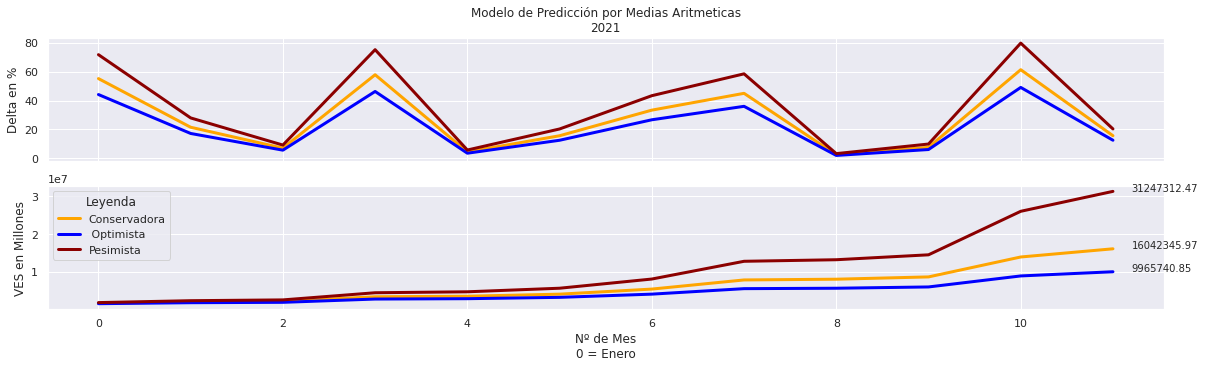

In [62]:
# Plot Banco Central y Monitor
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True)

# Delta de Devaluación Mensual Predicha
ax[0].plot(df_predict_1['2021']['Delta Conservadora'].values, 'orange', label = 'Predict Conservador', linewidth = 3)
ax[0].plot(df_predict_1['2021']['Delta Optimista'].values, 'blue', label = 'Predict Optimista', linewidth = 3)
ax[0].plot(df_predict_1['2021']['Delta Pesimista'].values, 'darkred', label = 'Predict Pesimista', linewidth = 3)
ax[0].set_ylabel('Delta en %')
ax[0].set_title('Modelo de Predicción por Medias Aritmeticas\n2021')

# Devaluación en los tres escenarios
ax[1].plot(df_predict_2['2021']['Conservadora'].values, 'orange', label = 'Conservadora', linewidth = 3)
ax[1].plot(df_predict_2['2021']['Optimista'].values, 'blue', label = ' Optimista', linewidth = 3)
ax[1].plot(df_predict_2['2021']['Pesimista'].values, 'darkred', label = 'Pesimista', linewidth = 3)
ax[1].legend(loc = 'upper left', title = 'Leyenda')
ax[1].set_ylabel('VES en Millones')
ax[1].set_xlabel('Nº de Mes\n0 = Enero')

# Etiquetas
ax[1].text(x = 11.2, y = df_predict_2['Conservadora']['2021-12-31'], s = round(df_predict_2['Conservadora']['2021-12-31'], 2), fontsize = 10)
ax[1].text(x = 11.2, y = df_predict_2['Optimista']['2021-12-31'], s = round(df_predict_2['Optimista']['2021-12-31'], 2), fontsize = 10)
ax[1].text(x = 11.2, y = df_predict_2['Pesimista']['2021-12-31'], s = round(df_predict_2['Pesimista']['2021-12-31'], 2), fontsize = 10)



Se ha tomado en cuenta un crecimiento **Pesimista** del 30% y **Optimista** del -20$ con respecto al valor **Conservador**

In [63]:
# DataFrame final con la proyección y sus deltas
df_finale = pd.concat([df_predict_1, df_predict_2], axis = 1, ignore_index = False)
df_finale

,Delta Conservadora,Delta Optimista,Delta Pesimista,Conservadora,Optimista,Pesimista
2021-01-31,55.186320,44.149056,71.742216,1.626996e+06,1.511280e+06,1.800570e+06
2021-02-28,21.506454,17.205163,27.958391,1.976905e+06,1.771298e+06,2.303981e+06
2021-03-31,7.052836,5.642269,9.168687,2.116333e+06,1.871239e+06,2.515226e+06
2021-04-30,57.836561,46.269249,75.187529,3.340347e+06,2.737048e+06,4.406362e+06
2021-05-31,4.421541,3.537233,5.748003,3.488042e+06,2.833863e+06,4.659640e+06
2021-06-30,15.624144,12.499315,20.311387,4.033019e+06,3.188077e+06,5.606077e+06
2021-07-31,33.341207,26.672966,43.343569,5.377676e+06,4.038431e+06,8.035951e+06
2021-08-31,44.977830,35.982264,58.471179,7.796438e+06,5.491550e+06,1.273467e+07
2021-09-30,2.502894,2.002315,3.253762,7.991574e+06,5.601509e+06,1.314902e+07
2021-10-31,7.609153,6.087322,9.891899,8.599665e+06,5.942490e+06,1.444971e+07


Retornamos un archivo xlsx para su manejo en futuras operaciones.

In [64]:
# Exportar xlsx
df_finale.to_excel('Predicción Monetaria.xlsx', sheet_name='Predicción 2021')